In [262]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [263]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
data_file='/drive/MyDrive/customer_churn_data.csv'

In [265]:
data = pd.read_csv(data_file)
data.head()
#  got the rough idea of what is being stored in each column.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [266]:
data.info()
# Conclusion - 
# 1. There are 21 column. Churn is dependent col. 
# 2. No Null value. Need to check for blank value.
# 3. Total Charge is object. It should be float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [267]:
# Find out 
# Total number of observations.
# No. of variables, data type of variables.
# Dependent and independent variables.
# Statistics on the variables.
# Missing values in any of the variables.
# Check class distribution of dependent variable.
# Clean the dataset
# Take care of missing data
# Label Encode Binary data
# Exploratory Data Analysis
# Plot Histograms, bar charts etc
# Note down all observations

In [268]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Checking TotalCharges Column

In [269]:
filt = data['TotalCharges'] == ' '
data.loc[data[filt].index]
# Conclusion 
# 1. TotalCharge has 11 rows with blank data.
# 2. gender - Both Men and women
# 3. No senior citizen in blank rows
# 4. Contract are One Year and Two Year
# 5. Tenure is 0. As tenure is 0 we can drop them.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [270]:
data.drop(index=data[filt].index, inplace=True)

In [271]:
data['TotalCharges']= data.TotalCharges.astype(float)

Outlier Detection 

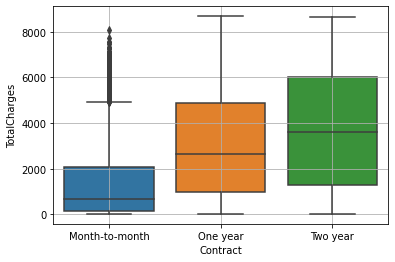

In [272]:
sns.boxplot(x='Contract', y='TotalCharges', data=data)
plt.grid(True)
# Conclusion - There are outliers for month-to-month contract but they are continous. Doesnot look abnormal. Lets have a look to those outliers.

In [273]:
data[(data.Contract == 'Month-to-month') & (data.TotalCharges > 5000) ]
# InternetService is Fiber optic  which is supposed to be costly.
# There are MultipleLines also. 
# Tenure is also high 
# so it is fine to have high TotalCharges.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
61,1215-FIGMP,Male,0,No,No,60,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.90,5450.70,No
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),111.05,7107.00,No
110,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.90,Yes
197,6168-YBYNP,Male,0,No,No,59,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.35,6519.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,4070-OKWVH,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),94.60,5025.80,No
6952,6394-MFYNG,Female,0,No,No,48,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.40,5121.30,Yes
6965,7789-CRUVC,Female,1,Yes,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,No
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No


Univariate Analysis

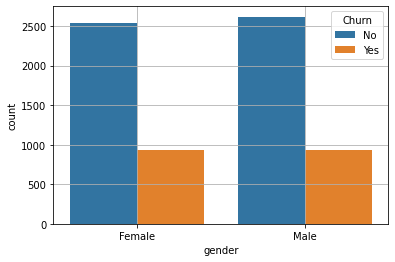

In [274]:
sns.countplot(x='gender', data=data, hue='Churn')
plt.grid(True)
# Conclusion
# 1. Equal number of male and female in sample.
# 2. Churn is also same for both

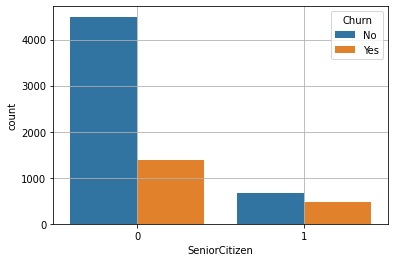

In [275]:
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')
plt.grid(True)
# Conclusion
# 1. Less count of SeniorCitizen in sample. This is normal as representation of society.
# 2. Higher %ge of SeniorCitizen is likly to retain 

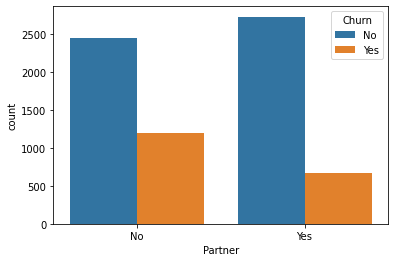

In [276]:
sns.countplot(x='Partner', data=data, hue='Churn', order=['No', 'Yes'])
# Conclusion
# 1. Equal represetion of Partner in sample set
# 2. Higher %ge retention in for No Partner

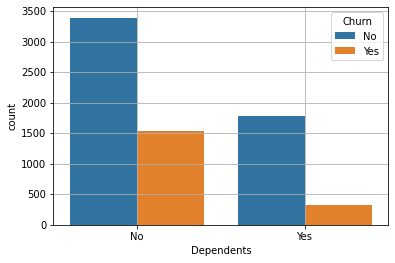

In [277]:
sns.countplot(x='Dependents', data=data, hue='Churn')
plt.grid(True)
# Conclusion - Higher %ge retention for No Dependents

# Combining above graph we can assume that rentition for group of user(dependent + partner) is poor

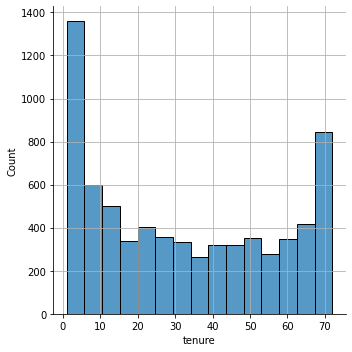

In [278]:
sns.displot(data.tenure)
plt.grid(True)
plt.show()
# conclusion - Large section of peopel are in < 10 tenure. Lets check those data

In [279]:
sorted(data.tenure.unique())
# Conclusion - tenture is a continuous data with min value = 0 and max value = 72. 
# People generally take the service in period like 6 months, 12 months etc. so we can bin it.

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72]

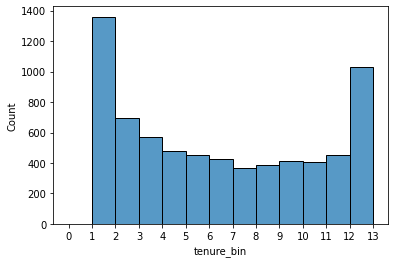

In [280]:
data['tenure_bin'] = data.tenure.apply(lambda x : (x // 6) + 1 )
sns.histplot(data.tenure_bin, bins=range(0, 14))
plt.xticks(range(0,14))
plt.show()
# conclusion - More people has 6 months tenure period 

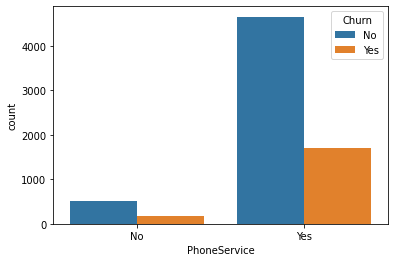

In [281]:
sns.countplot(x='PhoneService', data=data, hue='Churn')

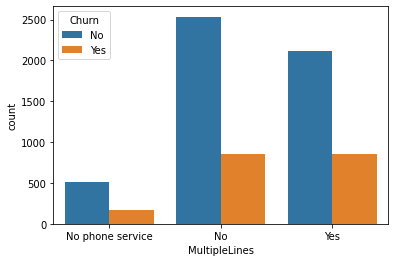

In [282]:
sns.countplot(x='MultipleLines', data=data, hue='Churn')

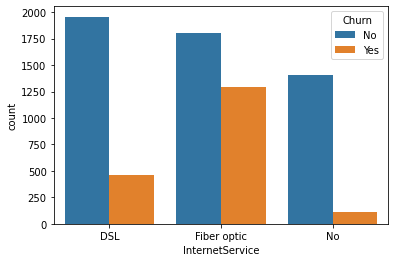

In [283]:
sns.countplot(x='InternetService', data=data, hue='Churn')
# conclusion - Fiber optic has better retention rate 

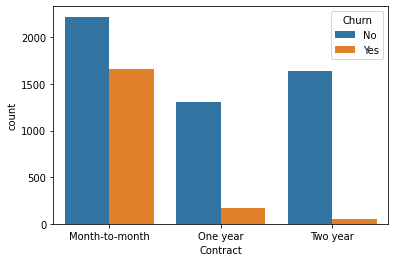

In [284]:
sns.countplot(x='Contract', data=data, hue='Churn')
# Monthly retention is better. Need to check relationship with tenure.

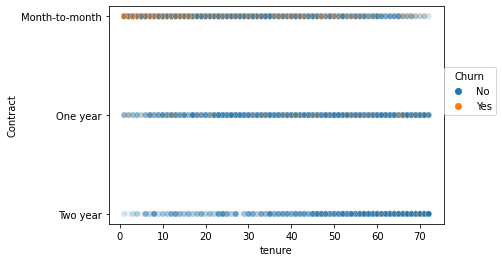

In [285]:
sns.scatterplot(y='Contract', x='tenure', data=data, alpha=0.1, hue='Churn')
plt.legend(loc=[1,0.5], title='Churn')
# Conclusion  - Monthly retention is better then yearly and two yearly.
# people with month-to-month contract are saying yes even after 60 months

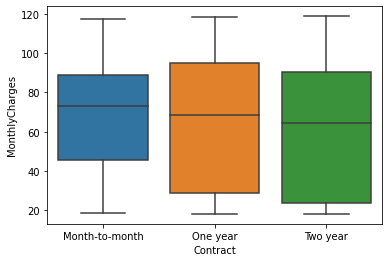

In [286]:
sns.boxplot(y='MonthlyCharges', x='Contract', data=data)
# Mean monthly charges are reducing as contract period increases.

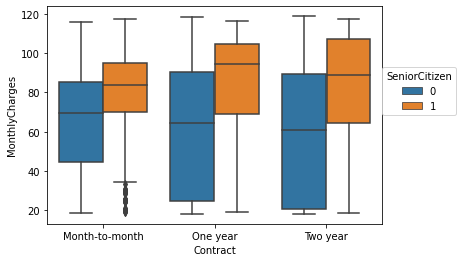

In [287]:
sns.boxplot(y='MonthlyCharges', x='Contract', data=data, hue='SeniorCitizen')
plt.legend(loc=[1,0.5], title='SeniorCitizen')
#  somehow Senior Citizen are paying higher charge. need to check the data

In [288]:
data[data.SeniorCitizen == 1]
# Appears as if they are using multiple service(phone, multiline, internet) which is driving the cost up. 
# looks normal as older people donot want to negotiate with differnt vendor and take service from one vendor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,12
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,1
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,1
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No,11
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,2
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No,10
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1


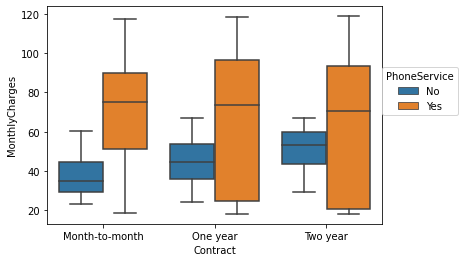

In [289]:
sns.boxplot(y='MonthlyCharges', x='Contract', data=data, hue='PhoneService')
plt.legend(loc=[1,0.5], title='PhoneService')
# prices are varying as per the services used.

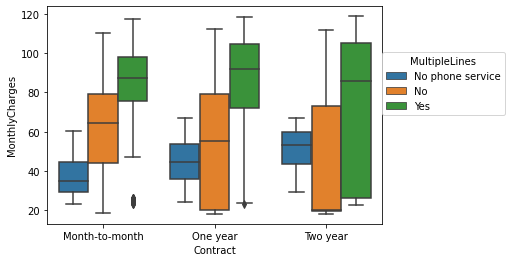

In [290]:
sns.boxplot(y='MonthlyCharges', x='Contract', data=data, hue='MultipleLines')
plt.legend(loc=[1,0.5], title='MultipleLines')

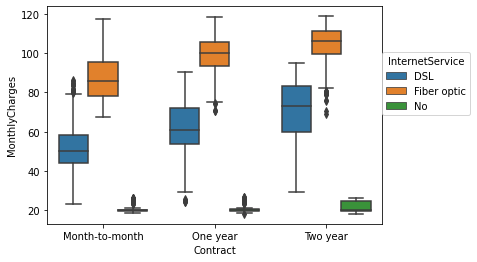

In [291]:
sns.boxplot(y='MonthlyCharges', x='Contract', data=data, hue='InternetService')
plt.legend(loc=[1,0.5], title='InternetService')

In [292]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bin'],
      dtype='object')

Below service are available only with internet service. People with streaming service have comparitively less retention.

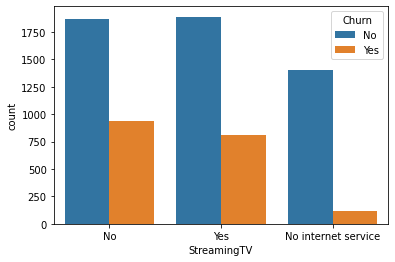

In [293]:
sns.countplot(x='StreamingTV', data=data, hue='Churn')

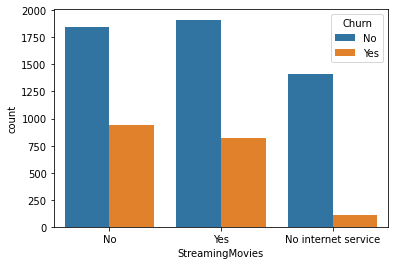

In [294]:
sns.countplot(x='StreamingMovies', data=data, hue='Churn')